# ShorelineMonitor Shorelines

The ShorelineMonitor dataset provides [Satellite-Derived Shorelines (SDS)](https://radiantearth.github.io/stac-browser/#/external/coclico.blob.core.windows.net/stac/v1/shorelinemonitor-shorelines/collection.json) extracted from annually
composited Landsat satellite imagery spanning the years 1984-2024. These shorelines offer a global
view of coastal change and shoreline dynamics, serving as a critical foundation for global coastal
monitoring and analytics.

The shorelines are LineStrings with additional attributes such as measures of curvature (sinuosity, fractal dimension and self-intersection density) as well as composite
image identifiers, cloud-coverage metrics, and some parameters used in the shoreline extraction process.

This dataset builds on earlier efforts by Luijendijk et al. (2018) and Deltares RPC, and has now been processed as cloud-native dataset (Calkoen et al. 2025) to enhance global-scale coastal analytics. The dataset is available upon reasonable request. Please contact the data provider for more information or collaboration opportunities.

In [15]:
import os

import dotenv
import fsspec
import geopandas as gpd
import hvplot.pandas
import pandas as pd
import pystac
import shapely
from dotenv import load_dotenv
from ipyleaflet import Map, basemaps

from coastpy.stac.utils import read_snapshot

# Specify the absolute path to the .env file
dotenv_path = "/Users/juulhemmes/Documents/Studie/Msc/Thesis/coastpy/ATT64895.env"

load_dotenv(dotenv_path=dotenv_path)

# Configure cloud and Dask settings
sas_token = os.getenv("AZURE_STORAGE_SAS_TOKEN")
storage_options = {"account_name": "coclico", "sas_token": sas_token}


coclico_catalog = pystac.Catalog.from_file(
    "https://coclico.blob.core.windows.net/stac/v1/catalog.json"
)
collection = coclico_catalog.get_child("shorelinemonitor-shorelines")

In [16]:
snapshot = read_snapshot(collection, storage_options=storage_options)
snapshot.head()

,type,stac_version,stac_extensions,id,geometry,bbox,links,assets,collection,created,table:columns,proj:bbox,proj:epsg,start_datetime,end_datetime,table:row_count,datetime,href
0,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,s51w76-e8c071,"POLYGON ((-72.98845 -50.7969, -72.98845 -47.35...","[-75.794985, -50.796903, -72.988452, -47.35392]",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset with...,shorelinemonitor-shorelines,2025-01-12 22:14:53.145456+00:00,[{'description': 'Unique identifier for the sh...,"[-75.794985, -50.796903, -72.988452, -47.35392]",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,137677,2003-07-02 12:00:00+00:00,az://shorelinemonitor-shorelines/release/2025-...
1,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,s54w76-cbbfc5,"POLYGON ((-71.86553 -54.09138, -71.86553 -48.8...","[-75.794985, -54.091376, -71.865526, -48.853586]",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset with...,shorelinemonitor-shorelines,2025-01-12 22:16:10.455011+00:00,[{'description': 'Unique identifier for the sh...,"[-75.794985, -54.091376, -71.865526, -48.853586]",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,144301,2003-07-02 12:00:00+00:00,az://shorelinemonitor-shorelines/release/2025-...
2,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,s55w75-6d19de,"POLYGON ((-71.86553 -54.90641, -71.86553 -52.4...","[-74.952911, -54.906406, -71.865526, -52.412487]",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset with...,shorelinemonitor-shorelines,2025-01-12 22:17:00.088371+00:00,[{'description': 'Unique identifier for the sh...,"[-74.952911, -54.906406, -71.865526, -52.412487]",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,94271,2003-07-02 12:00:00+00:00,az://shorelinemonitor-shorelines/release/2025-...
3,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,s56w68-2bdac5,"POLYGON ((-57.54863 -56.02042, -57.54863 -50.8...","[-67.934789, -56.020416, -57.548626, -50.844312]",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset with...,shorelinemonitor-shorelines,2025-01-12 22:17:28.329205+00:00,[{'description': 'Unique identifier for the sh...,"[-67.934789, -56.020416, -57.548626, -50.844312]",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,45402,2003-07-02 12:00:00+00:00,az://shorelinemonitor-shorelines/release/2025-...
4,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,s56w72-b9028f,"POLYGON ((-58.95231 -55.77691, -58.95231 -47.3...","[-71.864888, -55.776911, -58.952308, -47.35394]",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset with...,shorelinemonitor-shorelines,2025-01-12 22:18:46.796789+00:00,[{'description': 'Unique identifier for the sh...,"[-71.864888, -55.776911, -58.952308, -47.35394]",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,146375,2003-07-02 12:00:00+00:00,az://shorelinemonitor-shorelines/release/2025-...


In [17]:
snapshot.explore()

## Select a region of interest

Wait for map to render and zoom to area of interest. 

In [18]:
from ipyleaflet import Map, basemaps

m = Map(basemap=basemaps.Esri.WorldImagery, scroll_wheel_zoom=True)
m.center = (43.32, -1.97)
m.zoom = 14
m.layout.height = "800px"
m

Map(center=[43.32, -1.97], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [54]:
from coastpy.geo.utils import get_region_of_interest_from_map

roi = get_region_of_interest_from_map(m, default_extent=(4.796, 53.108, 5.229, 53.272))
west, south, east, north = list(roi.total_bounds)

m.center = (25.31, -14.82)
m.zoom = 17.0
west, south, east, north = (-14.826, 25.303, -14.810, 25.311)


## Fetch data

In [55]:
import coastpy

db = coastpy.io.STACQueryEngine(
    stac_collection=collection,
    storage_backend="azure",
    # columns = ["geometry", "shoreline_id", "datetime", "bbox", ] ... # when you don't need all data
)

In [56]:
from coastpy.utils.config import fetch_sas_token

sas_token = fetch_sas_token(sas_token)
df = db.get_data_within_bbox(west, south, east, north, sas_token=sas_token)
print(f"Shape: {df.shape}")
df.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Shape: (35, 21)


,shoreline_id,datetime,geometry,bbox,quadkey,otsu_threshold,otsu_separability,sinuosity,self_intersection_density,fractal_dimension,...,filter_n_points,source,box_id,composite:image_id,composite:start_datetime,composite:end_datetime,composite:determination_datetimes,composite:cloud_cover,coastal_zone:buffer_distance,coastal_zone:source
0,box_142_055-04572-21766,2020-01-01,"LINESTRING (-14.72172 25.50153, -14.72184 25.5...","{'xmax': -14.721715, 'xmin': -14.828572, 'ymax...",0331230,-0.175781,2.050713,1.082112,3010.530762,0.940652,...,100,BOX_142_055,BOX_142,2020-01-01-2020-12-31_IM_L5,2020-01-05 12:11:07+01:00,2020-12-30 12:31:09+01:00,"[2020-01-05T11:11:07.000000, 2020-01-06T11:24:...","[7, 11.34000015258789, 4.53000020980835, 1.360...",0,OSM-Coastline
1,box_142_055-04573-21765,2021-01-01,"LINESTRING (-14.72116 25.50153, -14.72122 25.5...","{'xmax': -14.721159, 'xmin': -14.828572, 'ymax...",0331230,-0.175781,2.061938,1.083797,2990.029541,0.939418,...,100,BOX_142_055,BOX_142,2021-01-01-2022-01-01_IM_L5,2021-01-07 11:48:54+01:00,2021-12-26 12:24:57+01:00,"[2021-01-07T10:48:54.000000, 2021-01-08T11:24:...","[33, 20.25, 24.899999618530273, 3, 0, 3.509999...",0,OSM-Coastline
2,box_142_055-04574-21764,2022-01-01,"LINESTRING (-14.81171 25.33967, -14.81178 25.3...","{'xmax': -14.811709, 'xmin': -14.828842, 'ymax...",0331230,-0.187500,2.047974,1.078244,2387.372070,0.969728,...,100,BOX_142_055,BOX_142,2022-01-01-2023-01-01,2022-01-02 12:30:42+01:00,2022-12-29 12:25:05+01:00,"[2022-01-02T11:30:42.000000, 2022-01-02T11:31:...","[0.01, 0.04, 0, 0, 0.01, 0.01, 0.03, 0.05, 20,...",0,OSM-Coastline
3,box_142_055-04575-21762,2023-01-01,"LINESTRING (-14.72143 25.50153, -14.7215 25.50...","{'xmax': -14.721428, 'xmin': -14.828574, 'ymax...",0331230,-0.191406,2.059029,1.094029,3102.431641,0.932642,...,100,BOX_142_055,BOX_142,2023-01-01-2024-01-01,2023-01-03 10:35:45+01:00,2023-12-23 12:31:04+01:00,"[2023-01-03T09:35:45.000000, 2023-01-03T09:36:...","[0, 0, 0, 0.03, 1, 0, 0.02, 0.01, 0, 21, 3.87,...",0,OSM-Coastline
4,box_142_055-04571-21768,2019-01-01,"LINESTRING (-14.72172 25.50153, -14.72184 25.5...","{'xmax': -14.721715, 'xmin': -14.828572, 'ymax...",0331230,-0.171875,2.062551,1.077429,2969.390625,0.944006,...,100,BOX_142_055,BOX_142,2019-01-01-2020-01-01_IM_L5,2019-01-02 12:25:38+01:00,2019-12-29 12:05:42+01:00,"[2019-01-02T11:25:38.000000, 2019-01-03T11:24:...","[0, 44.13999938964844, 0.9200000166893005, 0.0...",0,OSM-Coastline


## Plot the data on a map

Currently the hvplot() method for linestrings (paths) is broken, so we use matplotlib. 

In [57]:
df = gpd.overlay(df, roi)
df = df.assign(year=pd.to_datetime(df.datetime).dt.strftime("%Y"))
df["year"] = df["year"].astype("int16")

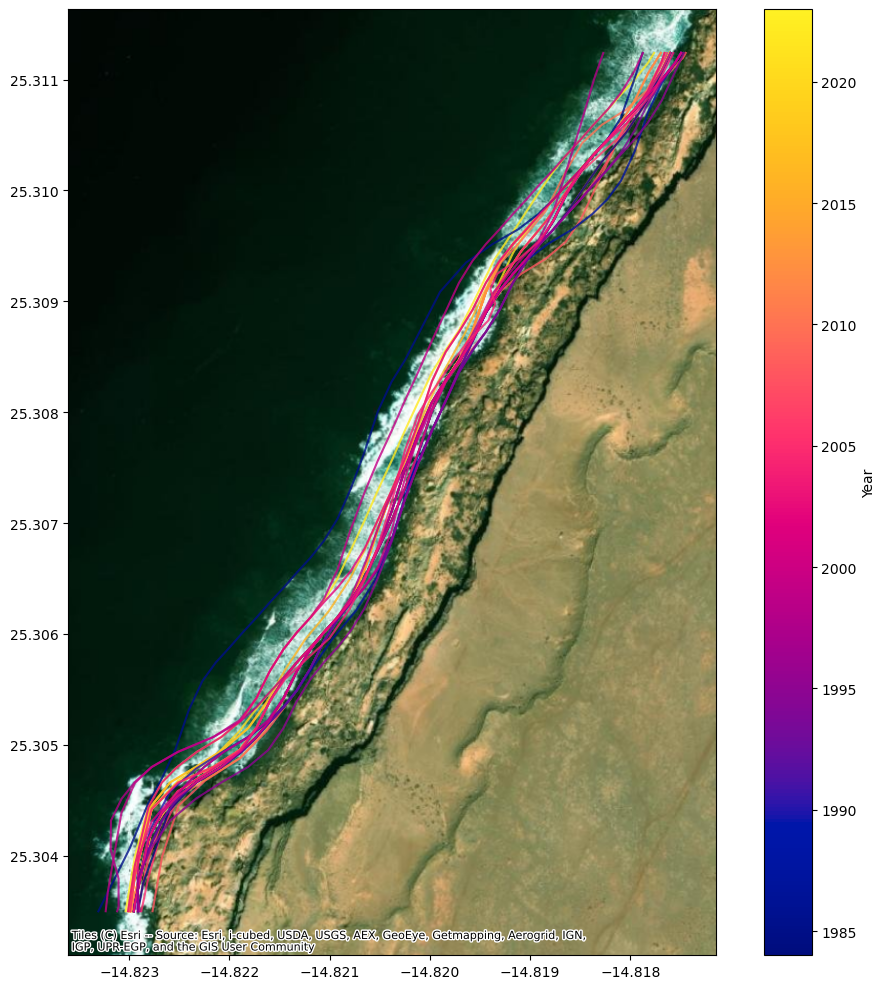

In [58]:
import colorcet as cc
import contextily as ctx
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cmap = cc.m_bmy

df.plot(
    ax=ax,
    column="year",  #
    cmap=cmap,
    legend=True,
    legend_kwds={"label": "Year", "orientation": "vertical"},
    linewidth=1.5,
    alpha=0.8,
)


ctx.add_basemap(
    ax, crs=df.crs.to_string(), source=ctx.providers.Esri.WorldImagery
)

plt.tight_layout()
plt.show()

## Work with the full dataset

In [10]:
import dask_geopandas

fs = fsspec.filesystem("az", **storage_options)
urlpaths = snapshot.href.to_list()
ddf = dask_geopandas.read_parquet(urlpaths, filesystem=fs)

In [11]:
ddf

,shoreline_id,datetime,otsu_threshold,otsu_separability,sinuosity,self_intersection_density,fractal_dimension,filter_length,filter_n_points,source,box_id,geometry,bbox,quadkey,composite:image_id,composite:start_datetime,composite:end_datetime,composite:determination_datetimes,composite:cloud_cover,coastal_zone:buffer_distance,coastal_zone:source
npartitions=149,,,,,,,,,,,,,,,,,,,,,
,string,datetime64[ns],float32,float32,float32,float32,float32,int32,int32,string,string,geometry,object,string,string,"datetime64[ns, UTC]","datetime64[ns, UTC]",object,object,int32,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
